## Cross - validation for parameter tuning

## Model and feature selection

### Agenda

 - What is the drawback of using the <code>**train/test split**</code> procedure for model evaluation
 - How does <code>**K-fold cross-validation**</code> overcomes this limitation ?
 - How can cross-validation be used for selectin tunning parameters, models, features
 - What are some possible improvements to cross validation ?

### Model evaliation procedures

<code>**Motivation:**</code>Need a way to choose between machine learning models<br>

<code>**Goal:**</code> to estimate likely performance of a model on <code>**out of sample data**</code><br>

<code>**Method I:**</code>When training and testing on the same data we maximize <code>**training accuracy**</code> that reward overly complex models which <code>**overfit**</code> the training data and are <code>**unlikely to generalize on future data**</code> .<br>

<code>**Method II:**</code> this means <code>**train test split the dataset into two pieces**</code> so that the model can be trained and test on <code>**different data**</code>. 
   - <code>**Testing acccuracy**</code> is a better estimate than training accuracy of out of sample performance
   - <code>**High variance**</code> estimate is provided since changing which observations happen to be in in the testing set can significantly change testing accuracy!



In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [51]:
logreg = LogisticRegression(solver='newton-cg')

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_a = logreg.predict(X_test)

In [56]:
y_pred_a

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [57]:
y_pred_b = knn.predict(X_test)

In [58]:
y_pred_b

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [59]:
accuracy_a = metrics.accuracy_score(y_test, y_pred_a)

In [60]:
accuracy_b = metrics.accuracy_score(y_test, y_pred_b)

In [61]:
print(f'logreg acc: {accuracy_a}')
print(f'knn    acc: {accuracy_b}')

logreg acc: 0.9736842105263158
knn    acc: 1.0


We can change the train/test split random state and it will take different slices and produce different prediction results. This is why testing accuracy is knowned as <code>**High variance**</code> estimate.

But we can actually created <code>**a bunch of train/test splits**</code> not only one single, then calculate the testing accuracy for each and average the result together. And that is <code>**cross-validation**</code> technique that we apply in order to reduce the variance.

### Steps for K-fold cross-validation
Lets walk trough steps k-fold cross validation which is the most common type of cross validation

 - Split the dataset in <code>**K equal**</code> partitions or "folds";
 - Use fold 1 as the testing set and the union of the other folds as the training set;
 - Train model, make predictions and calculate testing accuracy
 - Repeat steps 2 and 3 K times, using a different fold as the testing set each time;
 - Use the average testing accuracy <code>**cross-validated accuracy**</code> as the estimate of out of sample accuracy.
 
 <code>**5-fold cross-validation:**</code>

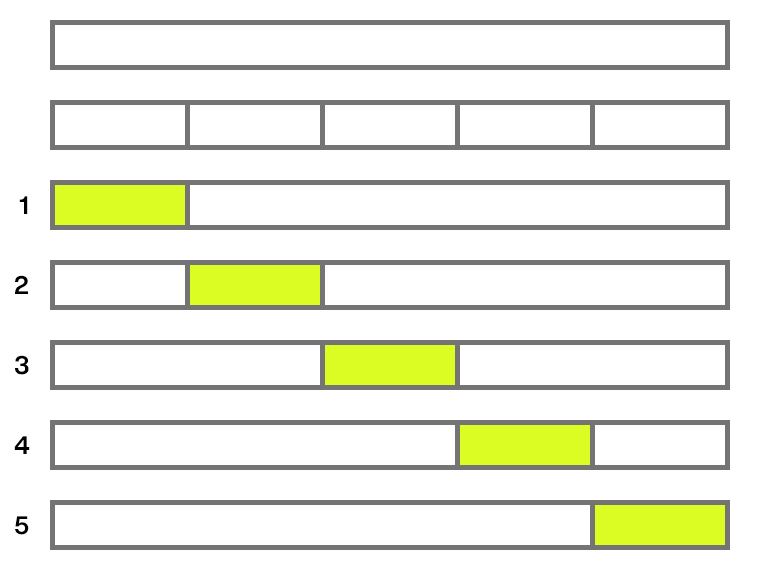

<code>**We are dividing the observations, not the features in k-folds!**</code>
That might be confusing from diagram, since normally we represent observations as rows wheres this diagram represents observations as columns

In [62]:
from sklearn.model_selection import KFold

In [79]:
kf = KFold(n_splits=5)

In [115]:
for iteration, data in enumerate(kf.split(X), start=1):
    print(f'Ireration: {iteration} \ntrain:\n{data[0]}\ntest:\n{data[1]}\n')

Ireration: 1 
train:
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
test:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

Ireration: 2 
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 

 - Dataset containt <code>**150 observations**</code> (0 through 149)
 - 5-fold cross validation, thus it runs for 5 iterations
 - For each iteration every observation is either in the training set or the testing set, but not both
 - Every observation is in the testing set exactly once

### Comparing cross-validation to train/test split

<code>**Advantages of cross-validation:**</code>
   - More accurate estimate of out of sample accuracy
   - More efficient use of data (every observation is used for both training and testing)
    
<code>**Advantages of train test split:**</code>
   - Runs K times faster thant K-fold cross-validation
   - Simpler to examine the detailed results of the testing process
    
<code>**Major recomendations for cross-validation:**</code>
   - K can be any number but K=10 is generally used. <code>**(Experimentally proved to return the most reliable estimate)**</code>
   - For classification problems, <code>**stratified sampling**</code> is recommended for creating the fold
    - Each response class should be represented with equal proportion in each of the k folds
    - In some frameworks like sklearn <code>**cross_val_score function does this by default**</code>

## Cross-validation: parameter tuning and model selection

<code>**Objective:**</code> select best hyperparameter for KNN and logreg on the iris dataset

In [118]:
from sklearn.model_selection import cross_val_score

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)

In [122]:
logreg = LogisticRegression(solver='newton-cg')

In [132]:
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

In [133]:
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

Out of sample accuracy

In [136]:
print(f'knn   : {scores_knn}')
print(f'logreg: {scores_logreg}')

knn   : 0.9666666666666668
logreg: 0.9733333333333334


In [141]:
# search for an optimal value for K of KNN

k_range  = range(1, 31)
k_scores = []

In [142]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

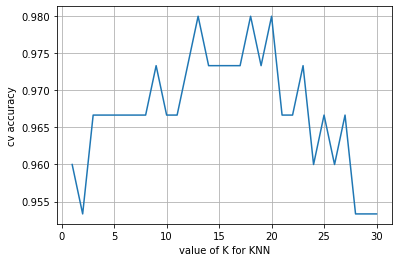

In [151]:
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('cv accuracy')
plt.grid(True)

This is the example of bias and variance trade of.
<code>**Underfitting happens**</code> when a model unable to capture the underlying pattern of the data. These models usually have <code>**high bias and low variance**</code>. <code>**Overfitting**</code> is the vice versa <code>**high variance and low bias**</code>

<code>**Compare two models**</code>

In [149]:
# 10-fold cv with the best KNN model
knn = KNeighborsClassifier(n_neighbors=18)
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(scores_knn)

0.9800000000000001


In [166]:
# 10-fold cv with the best KNN model
logreg = LogisticRegression(solver='newton-cg')
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
print(scores_logreg)

0.9733333333333334


In [167]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [173]:
# read in the advertising dataset
df = pd.read_csv('../data_samples/advertising.csv')

In [177]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df['Sales']

In [178]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [179]:
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [180]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [181]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051797


In [183]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = df[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090768


## Improvements to cross-validation

<code>**Repeated cross-validation**</code>
   - Repeat cross-validation multiple times (with different random splits of the data) and average the results
   - More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation
   
<code>**Creating a hold-out set**</code>

  - "Hold out" a portion of the data before beginning the model building process
  - Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
  - More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample 
 
<code>**Feature engineering and selection within cross-validation iterations**</code>

  - Normally, feature engineering and selection occurs before cross-validation
  - Instead, perform all feature engineering and selection within each cross-validation iteration
  - More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

<div class="alert alert-block alert-success">
<h2>Homework exercise </h2>
</div>

In [25]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data_samples/housing.csv')

<code>**Objective**</code> - by comparing different cross-validation results with models trained on different feature sets pick the highest accuracy model

<code>**Intermediate steps:**</code><br>

 <code>**1)**</code> Feature selection/filtering by data type<br>
 <code>**2)**</code> Make a covariance/correlation matrix to pick features that has insignificant correlation <br>
 <code>**3)**</code> Generate set of feature list with different combinations of ~ 5 features<br>
 <code>**4)**</code> Make normalized feature matrix<br>
 <code>**5)**</code> Collect train/test/validate results of models<br>

<code>**Feature selection/filtering by data type**</code>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
f_df = df.select_dtypes(include=np.int64)

<code>**Make a covariance/correlation matrix to pick features that has insignificant correlation**</code>

In [96]:
corr = f_df.corr()

In [97]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.14,0.03,-0.06,0.03,0.04,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotArea,-0.03,-0.14,1.00,0.11,-0.01,0.01,0.01,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.11,1.00,-0.09,0.57,0.55,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.01,0.57,-0.38,1.00,0.59,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.01,0.55,0.07,0.59,1.00,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
BsmtFinSF1,-0.01,-0.07,0.21,0.24,-0.05,0.25,0.13,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,-0.01,-0.07,0.11,-0.06,0.04,-0.05,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.04,0.05,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01
BsmtUnfSF,-0.01,-0.14,-0.00,0.31,-0.14,0.15,0.18,-0.50,-0.21,1.00,0.42,0.32,0.00,0.03,0.24,-0.42,-0.10,0.29,-0.04,0.17,0.03,0.25,0.05,0.21,0.18,-0.01,0.13,-0.00,0.02,-0.01,-0.04,-0.02,0.03,-0.04,0.21


In [115]:
for_corr = f_df.loc[:, ~f_df.columns.isin(['SalePrice', 'Id'])]

In [117]:
def filter_correlations(df, bound):
    corr_matrix = df.corr().abs()
    # True/False mask and apply it
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    # List column names of highly correlated features (r > bound)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > bound)]
    # Drop the features in the to_drop list
    reduced_df = df.drop(to_drop, axis=1)
    print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))
    return reduced_df

In [136]:
filtered_df = filter_correlations(for_corr, .51)

The reduced_df dataframe has 23 columns


<code>**Generate set of feature list with different combinations of ~ 5 features**</code>

In [159]:
from itertools import combinations

In [161]:
def generate_combinations(sample_list):
    list_combinations = []
    sample_set = set(sample_list)
    for n in range(1, len(sample_set) + 1):
        list_combinations += list(combinations(sample_set, n+5))

    return list_combinations

In [165]:
col_list = filtered_df.columns.tolist()

In [166]:
col_list

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearRemodAdd',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [167]:
generated_list = generate_combinations(col_list)

In [170]:
generated_list[1]

('HalfBath',
 'BsmtHalfBath',
 'OverallCond',
 'YearRemodAdd',
 'WoodDeckSF',
 'EnclosedPorch')

In [169]:
generated_list[-1]

('HalfBath',
 'BsmtHalfBath',
 'OverallCond',
 'YearRemodAdd',
 'WoodDeckSF',
 'GarageArea',
 'EnclosedPorch',
 'PoolArea',
 'YrSold',
 '3SsnPorch',
 'MSSubClass',
 'TotRmsAbvGrd',
 'ScreenPorch',
 'KitchenAbvGr',
 'MiscVal',
 'BsmtFullBath',
 'Fireplaces',
 'OpenPorchSF',
 'LowQualFinSF',
 'LotArea',
 'MoSold',
 'BsmtFinSF2',
 'BsmtUnfSF')

In [172]:
len(generated_list)

8344056

<code>**Make normalized feature matrix and train/test/validate results of models**</code>

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [204]:
def let_go(df, columns):
    logreg = LinearRegression()
    scaler = StandardScaler()
    y = f_df['SalePrice']
    y = y.to_numpy()
    y = y.reshape(-1, 1)
    scores = []
    for i in range(len(columns)):
        sub_set = df[list(columns[i])]                   
        scaler.fit(sub_set)
        X = scaler.transform(sub_set)
        neg_mse = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')
        mse_scores = -neg_mse
        rmse_scores = np.sqrt(mse_scores)
        scores.append(rmse_scores.mean())
    
    return scores

In [ ]:
calculated = let_go(f_df, generated_list)